<a href="https://colab.research.google.com/github/QiaoLin22/MASTER-LLM-DL/blob/main/ann_simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the target variable
# The 'sparse' argument has been removed. We now control the sparsity
# with 'sparse_output' parameter, setting it to False.
encoder = OneHotEncoder(sparse_output=False)  # use sparse_output instead of sparse
y = encoder.fit_transform(y.reshape(-1, 1))

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

In [3]:
# Set the ANN architecture
input_size = X_train.shape[1]  # Number of input features
hidden_size = 5  # Number of neurons in the hidden layer
output_size = y_train.shape[1]  # Number of output classes

# Initialize weights
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Activation function: Sigmoid and Softmax
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=1, keepdims=True)

In [4]:
def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


def compute_loss(Y, A2):
    m = Y.shape[0]
    logprobs = -np.log(A2[range(m), np.argmax(Y, axis=1)])
    loss = np.sum(logprobs) / m
    return loss


def backpropagation(X, Y, Z1, A1, A2):
    m = X.shape[0]

    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2

In [6]:
learning_rate = 0.01
def update_parameters(dW1, db1, dW2, db2):
    global W1, b1, W2, b2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

In [13]:
epochs = 2000
losses = []
accuracies = []

tracked_w1 = []  # Track the first weight
tracked_w2 = []  # Track the second weight
tracked_loss = []  # Track the loss value

for epoch in range(epochs):
    # Forward propagation
    Z1, A1, Z2, A2 = forward_propagation(X_train)

    # Compute loss
    loss = compute_loss(y_train, A2)
    losses.append(loss)

    # Track two weights and the loss
    tracked_w1.append(W1[0, 0])  # Tracking a specific weight W1[0,0]
    tracked_w2.append(W1[1, 0])  # Tracking another weight W1[1,0]
    tracked_loss.append(loss)     # Tracking the loss

    # Backward propagation
    dW1, db1, dW2, db2 = backpropagation(X_train, y_train, Z1, A1, A2)

    # Update weights
    update_parameters(dW1, db1, dW2, db2)

    # Compute accuracy
    predictions = np.argmax(A2, axis=1)
    accuracy = accuracy_score(np.argmax(y_train, axis=1), predictions)
    accuracies.append(accuracy)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

Epoch 0, Loss: 0.7163, Accuracy: 0.5750
Epoch 100, Loss: 0.6879, Accuracy: 0.6167
Epoch 200, Loss: 0.6623, Accuracy: 0.6500
Epoch 300, Loss: 0.6393, Accuracy: 0.6750
Epoch 400, Loss: 0.6186, Accuracy: 0.7000
Epoch 500, Loss: 0.5998, Accuracy: 0.7167
Epoch 600, Loss: 0.5828, Accuracy: 0.7250
Epoch 700, Loss: 0.5673, Accuracy: 0.7500
Epoch 800, Loss: 0.5532, Accuracy: 0.7500
Epoch 900, Loss: 0.5403, Accuracy: 0.7750
Epoch 1000, Loss: 0.5284, Accuracy: 0.8000
Epoch 1100, Loss: 0.5175, Accuracy: 0.8083
Epoch 1200, Loss: 0.5075, Accuracy: 0.8083
Epoch 1300, Loss: 0.4982, Accuracy: 0.8167
Epoch 1400, Loss: 0.4896, Accuracy: 0.8167
Epoch 1500, Loss: 0.4817, Accuracy: 0.8167
Epoch 1600, Loss: 0.4743, Accuracy: 0.8167
Epoch 1700, Loss: 0.4673, Accuracy: 0.8167
Epoch 1800, Loss: 0.4609, Accuracy: 0.8167
Epoch 1900, Loss: 0.4548, Accuracy: 0.8167


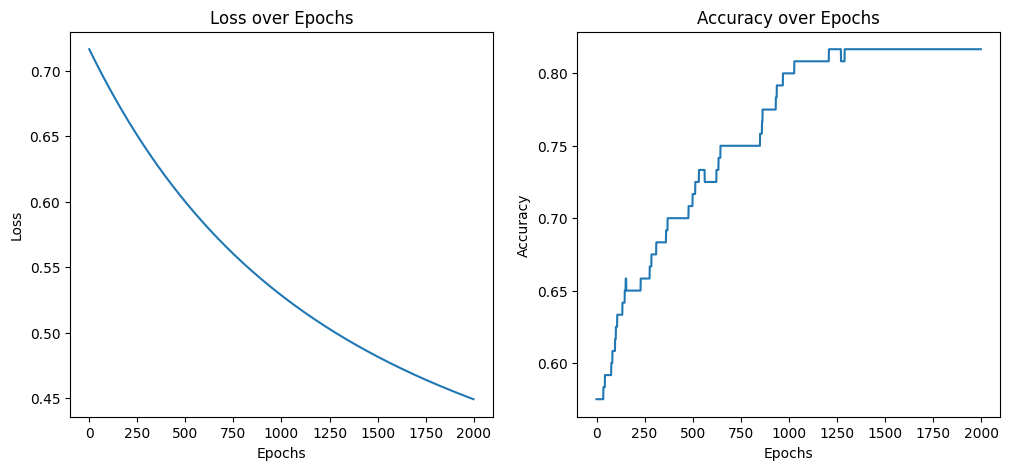

In [14]:
# Plot Loss and Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [15]:
_, _, _, A2_test = forward_propagation(X_test)
test_predictions = np.argmax(A2_test, axis=1)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), test_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9333


In [16]:
%%capture
!pip install plotly

In [17]:
import plotly.graph_objects as go

# Create a 3D scatter plot for the weights and loss
fig = go.Figure()

# Add the trace for the weight trajectory
fig.add_trace(go.Scatter3d(
    x=tracked_w1,  # Weight 1 (W1[0,0])
    y=tracked_w2,  # Weight 2 (W1[1,0])
    z=tracked_loss,  # Corresponding loss
    mode='lines',
    line=dict(color='blue', width=4),
    name='Gradient Descent Path'
))

# Customize layout
fig.update_layout(
    title='3D Gradient Descent Trajectory',
    scene=dict(
        xaxis_title='Weight 1 (W1[0,0])',
        yaxis_title='Weight 2 (W1[1,0])',
        zaxis_title='Loss',
    ),
    legend=dict(x=0.1, y=0.9),
    width=700,
    height=600,
)

# Display the plot
fig.show()

In [19]:
import plotly.graph_objects as go

def get_neuron_coordinates(layer_sizes):
    """
    Generate the x, y coordinates for each neuron in each layer.
    layer_sizes: List of integers representing the number of neurons in each layer
    Returns: Tuple of lists (x_coordinates, y_coordinates, layer_indices)
    """
    x_coords = []
    y_coords = []
    layer_indices = []

    for layer_index, layer_size in enumerate(layer_sizes):
        x = [layer_index] * layer_size  # x-coordinate is the layer index
        y = list(range(layer_size))  # y-coordinate separates neurons in the layer
        x_coords.extend(x)
        y_coords.extend(y)
        layer_indices.extend([layer_index] * layer_size)

    return x_coords, y_coords, layer_indices

# Define the structure: Input Layer (4 neurons), Hidden Layer (5 neurons), Output Layer (3 neurons)
layer_sizes = [4, 5, 3]
x_coords, y_coords, layer_indices = get_neuron_coordinates(layer_sizes)

In [20]:
# Create a figure
fig = go.Figure()

# Add nodes (neurons)
for layer_index in range(len(layer_sizes)):
    layer_size = layer_sizes[layer_index]
    for neuron_index in range(layer_size):
        neuron_x = x_coords[layer_indices.index(layer_index) + neuron_index]
        neuron_y = y_coords[layer_indices.index(layer_index) + neuron_index]

        # Add each neuron as a scatter point
        fig.add_trace(go.Scatter(
            x=[neuron_x], y=[neuron_y],
            mode='markers',
            marker=dict(size=20, color='blue'),
            name=f'Neuron {neuron_index} in Layer {layer_index}',
            showlegend=False
        ))

# Add connections (edges) between adjacent layers
for i in range(len(layer_sizes) - 1):  # Loop through each layer
    for neuron_index in range(layer_sizes[i]):
        for next_neuron_index in range(layer_sizes[i + 1]):
            # Get the coordinates for the current neuron and the next layer's neuron
            x0 = x_coords[layer_indices.index(i) + neuron_index]
            y0 = y_coords[layer_indices.index(i) + neuron_index]
            x1 = x_coords[layer_indices.index(i + 1) + next_neuron_index]
            y1 = y_coords[layer_indices.index(i + 1) + next_neuron_index]

            # Add a line between these two neurons
            fig.add_trace(go.Scatter(
                x=[x0, x1], y=[y0, y1],
                mode='lines',
                line=dict(color='black'),
                showlegend=False
            ))

# Customize layout
fig.update_layout(
    title='Artificial Neural Network Structure',
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    width=800,
    height=600
)

# Show the figure
fig.show()

In [23]:
# @title Part 1: Interactive Neural Network with Widgets

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
from IPython.display import display, clear_output
from tqdm.notebook import tqdm

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the target variable with sparse_output=True
encoder = OneHotEncoder(sparse_output=True)
y = encoder.fit_transform(y.reshape(-1, 1)).toarray()

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

# Define widgets for layer selection, neuron count, learning rate, and activation functions
layer_num_widget = widgets.IntSlider(value=3, min=2, max=5, step=1, description='Number of Layers')
neuron_list_widget = widgets.Text(value='4,5,3', description='Neurons per Layer')
activation_widget = widgets.Dropdown(options=['sigmoid', 'tanh', 'relu'], value='sigmoid', description='Activation')
learning_rate_widget = widgets.FloatSlider(value=0.01, min=0.001, max=0.1, step=0.001, description='Learning Rate')

# Layout the widgets
widget_box = widgets.VBox([layer_num_widget, neuron_list_widget, activation_widget, learning_rate_widget])

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

activation_functions = {
    'sigmoid': (sigmoid, sigmoid_derivative),
    'relu': (relu, relu_derivative),
    'tanh': (tanh, tanh_derivative)
}

# Function to build and train the model with a progress bar
def build_and_train_model(layer_sizes, activation_fn, learning_rate):
    # Initialize weights and biases
    weights = []
    biases = []
    for i in range(len(layer_sizes) - 1):
        weights.append(np.random.randn(layer_sizes[i], layer_sizes[i+1]))
        biases.append(np.zeros((1, layer_sizes[i+1])))

    tracked_w1 = []
    tracked_w2 = []
    tracked_loss = []
    losses = []
    accuracies = []

    # Activation functions
    activation, activation_derivative = activation_functions[activation_fn]

    def forward_propagation(X):
        activations = [X]
        for i in range(len(weights)):
            Z = np.dot(activations[-1], weights[i]) + biases[i]
            A = activation(Z) if i < len(weights) - 1 else softmax(Z)
            activations.append(A)
        return activations

    def backpropagation(activations, Y):
        m = X_train.shape[0]
        grads_w = []
        grads_b = []
        dA = activations[-1] - Y  # dZ for the output layer
        for i in reversed(range(len(weights))):
            dZ = dA
            grads_w.insert(0, np.dot(activations[i].T, dZ) / m)
            grads_b.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
            if i > 0:
                dA = np.dot(dZ, weights[i].T) * activation_derivative(activations[i])
        return grads_w, grads_b

    def update_parameters(grads_w, grads_b):
        for i in range(len(weights)):
            weights[i] -= learning_rate * grads_w[i]
            biases[i] -= learning_rate * grads_b[i]

    def compute_loss(A2, Y):
        m = Y.shape[0]
        logprobs = -np.log(A2[range(m), np.argmax(Y, axis=1)])
        return np.sum(logprobs) / m

    # Training loop with progress bar
    epochs = 1000
    with tqdm(total=epochs, desc="Training Progress") as pbar:
        for epoch in range(epochs):
            # Forward propagation
            activations = forward_propagation(X_train)
            loss = compute_loss(activations[-1], y_train)
            losses.append(loss)

            # Backward propagation
            grads_w, grads_b = backpropagation(activations, y_train)

            # Update parameters
            update_parameters(grads_w, grads_b)

            # Track two weights and the loss
            tracked_w1.append(weights[0][0, 0])  # Tracking a specific weight W1[0,0]
            tracked_w2.append(weights[0][1, 0])  # Tracking another weight W1[1,0]
            tracked_loss.append(loss)

            # Compute accuracy
            predictions = np.argmax(activations[-1], axis=1)
            accuracy = accuracy_score(np.argmax(y_train, axis=1), predictions)
            accuracies.append(accuracy)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

            # Update progress bar
            pbar.update(1)

    # Plot results
    plot_loss_accuracy(losses, accuracies)
    plot_gradient_descent(tracked_w1, tracked_w2, tracked_loss)

# Softmax for output layer
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=1, keepdims=True)

# Function to plot loss and accuracy
def plot_loss_accuracy(losses, accuracies):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(losses)
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(accuracies)
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.tight_layout()
    plt.show()

# 3D Gradient Descent Plot (Parameter Evolution and Loss) with Markers
def plot_gradient_descent(tracked_w1, tracked_w2, tracked_loss):
    fig = plt.figure(figsize=(15, 5))

    # Create a 3-column grid for different angles
    ax1 = fig.add_subplot(131, projection='3d')
    ax2 = fig.add_subplot(132, projection='3d')
    ax3 = fig.add_subplot(133, projection='3d')

    # Plot the same data in 3D on all axes
    for ax in [ax1, ax2, ax3]:
        ax.plot(tracked_w1, tracked_w2, tracked_loss, color='blue', lw=2)

        # Add scatter points at key positions (start, mid, end)
        ax.scatter(tracked_w1[0], tracked_w2[0], tracked_loss[0], color='red', s=50, label='Start')
        ax.scatter(tracked_w1[len(tracked_w1)//2], tracked_w2[len(tracked_w2)//2], tracked_loss[len(tracked_loss)//2], color='green', s=50, label='Mid')
        ax.scatter(tracked_w1[-1], tracked_w2[-1], tracked_loss[-1], color='orange', s=50, label='End')

        # Add text annotations for weights and loss at key points
        ax.text(tracked_w1[0], tracked_w2[0], tracked_loss[0], f'Start\nW1={tracked_w1[0]:.2f}\nW2={tracked_w2[0]:.2f}\nLoss={tracked_loss[0]:.2f}', color='black')
        ax.text(tracked_w1[len(tracked_w1)//2], tracked_w2[len(tracked_w2)//2], tracked_loss[len(tracked_loss)//2], f'Mid\nW1={tracked_w1[len(tracked_w1)//2]:.2f}\nW2={tracked_w2[len(tracked_w2)//2]:.2f}\nLoss={tracked_loss[len(tracked_loss)//2]:.2f}', color='black')
        ax.text(tracked_w1[-1], tracked_w2[-1], tracked_loss[-1], f'End\nW1={tracked_w1[-1]:.2f}\nW2={tracked_w2[-1]:.2f}\nLoss={tracked_loss[-1]:.2f}', color='black')

        ax.set_xlabel('Weight 1')
        ax.set_ylabel('Weight 2')
        ax.set_zlabel('Loss')

    # Rotate the axes for different views
    ax1.view_init(elev=30, azim=45)  # First view angle
    ax2.view_init(elev=30, azim=90)  # Second view angle
    ax3.view_init(elev=30, azim=135) # Third view angle

    # Set titles for the different views
    ax1.set_title('View 1: Azimuth 45°')
    ax2.set_title('View 2: Azimuth 90°')
    ax3.set_title('View 3: Azimuth 135°')

    plt.tight_layout()
    plt.show()

# Create a VBox to accumulate the results of multiple runs
output_vbox = widgets.VBox([])

# Callback function to handle the user's selections
def on_run_button_clicked(b):
    clear_output()
    display(widget_box, run_button, output_vbox)

    # Parse user input for layers and neurons
    layer_sizes = list(map(int, neuron_list_widget.value.split(',')))
    activation_fn = activation_widget.value
    learning_rate = learning_rate_widget.value

    # Create an output widget for each run
    output = widgets.Output()

    # Add this output to the VBox so that it appears as a new section for each run
    output_vbox.children += (output,)

    with output:
        print(f"Training for layer sizes: {layer_sizes}, activation: {activation_fn}, learning rate: {learning_rate}")

        # Train and visualize the model
        build_and_train_model(layer_sizes, activation_fn, learning_rate)

# Run button
run_button = widgets.Button(description="Run ANN")
run_button.on_click(on_run_button_clicked)

# Display the interface
display(widget_box, run_button, output_vbox)

Button(description='Run ANN', style=ButtonStyle())

VBox()

Training for sigmoid Activation:   0%|          | 0/45 [00:00<?, ?it/s]

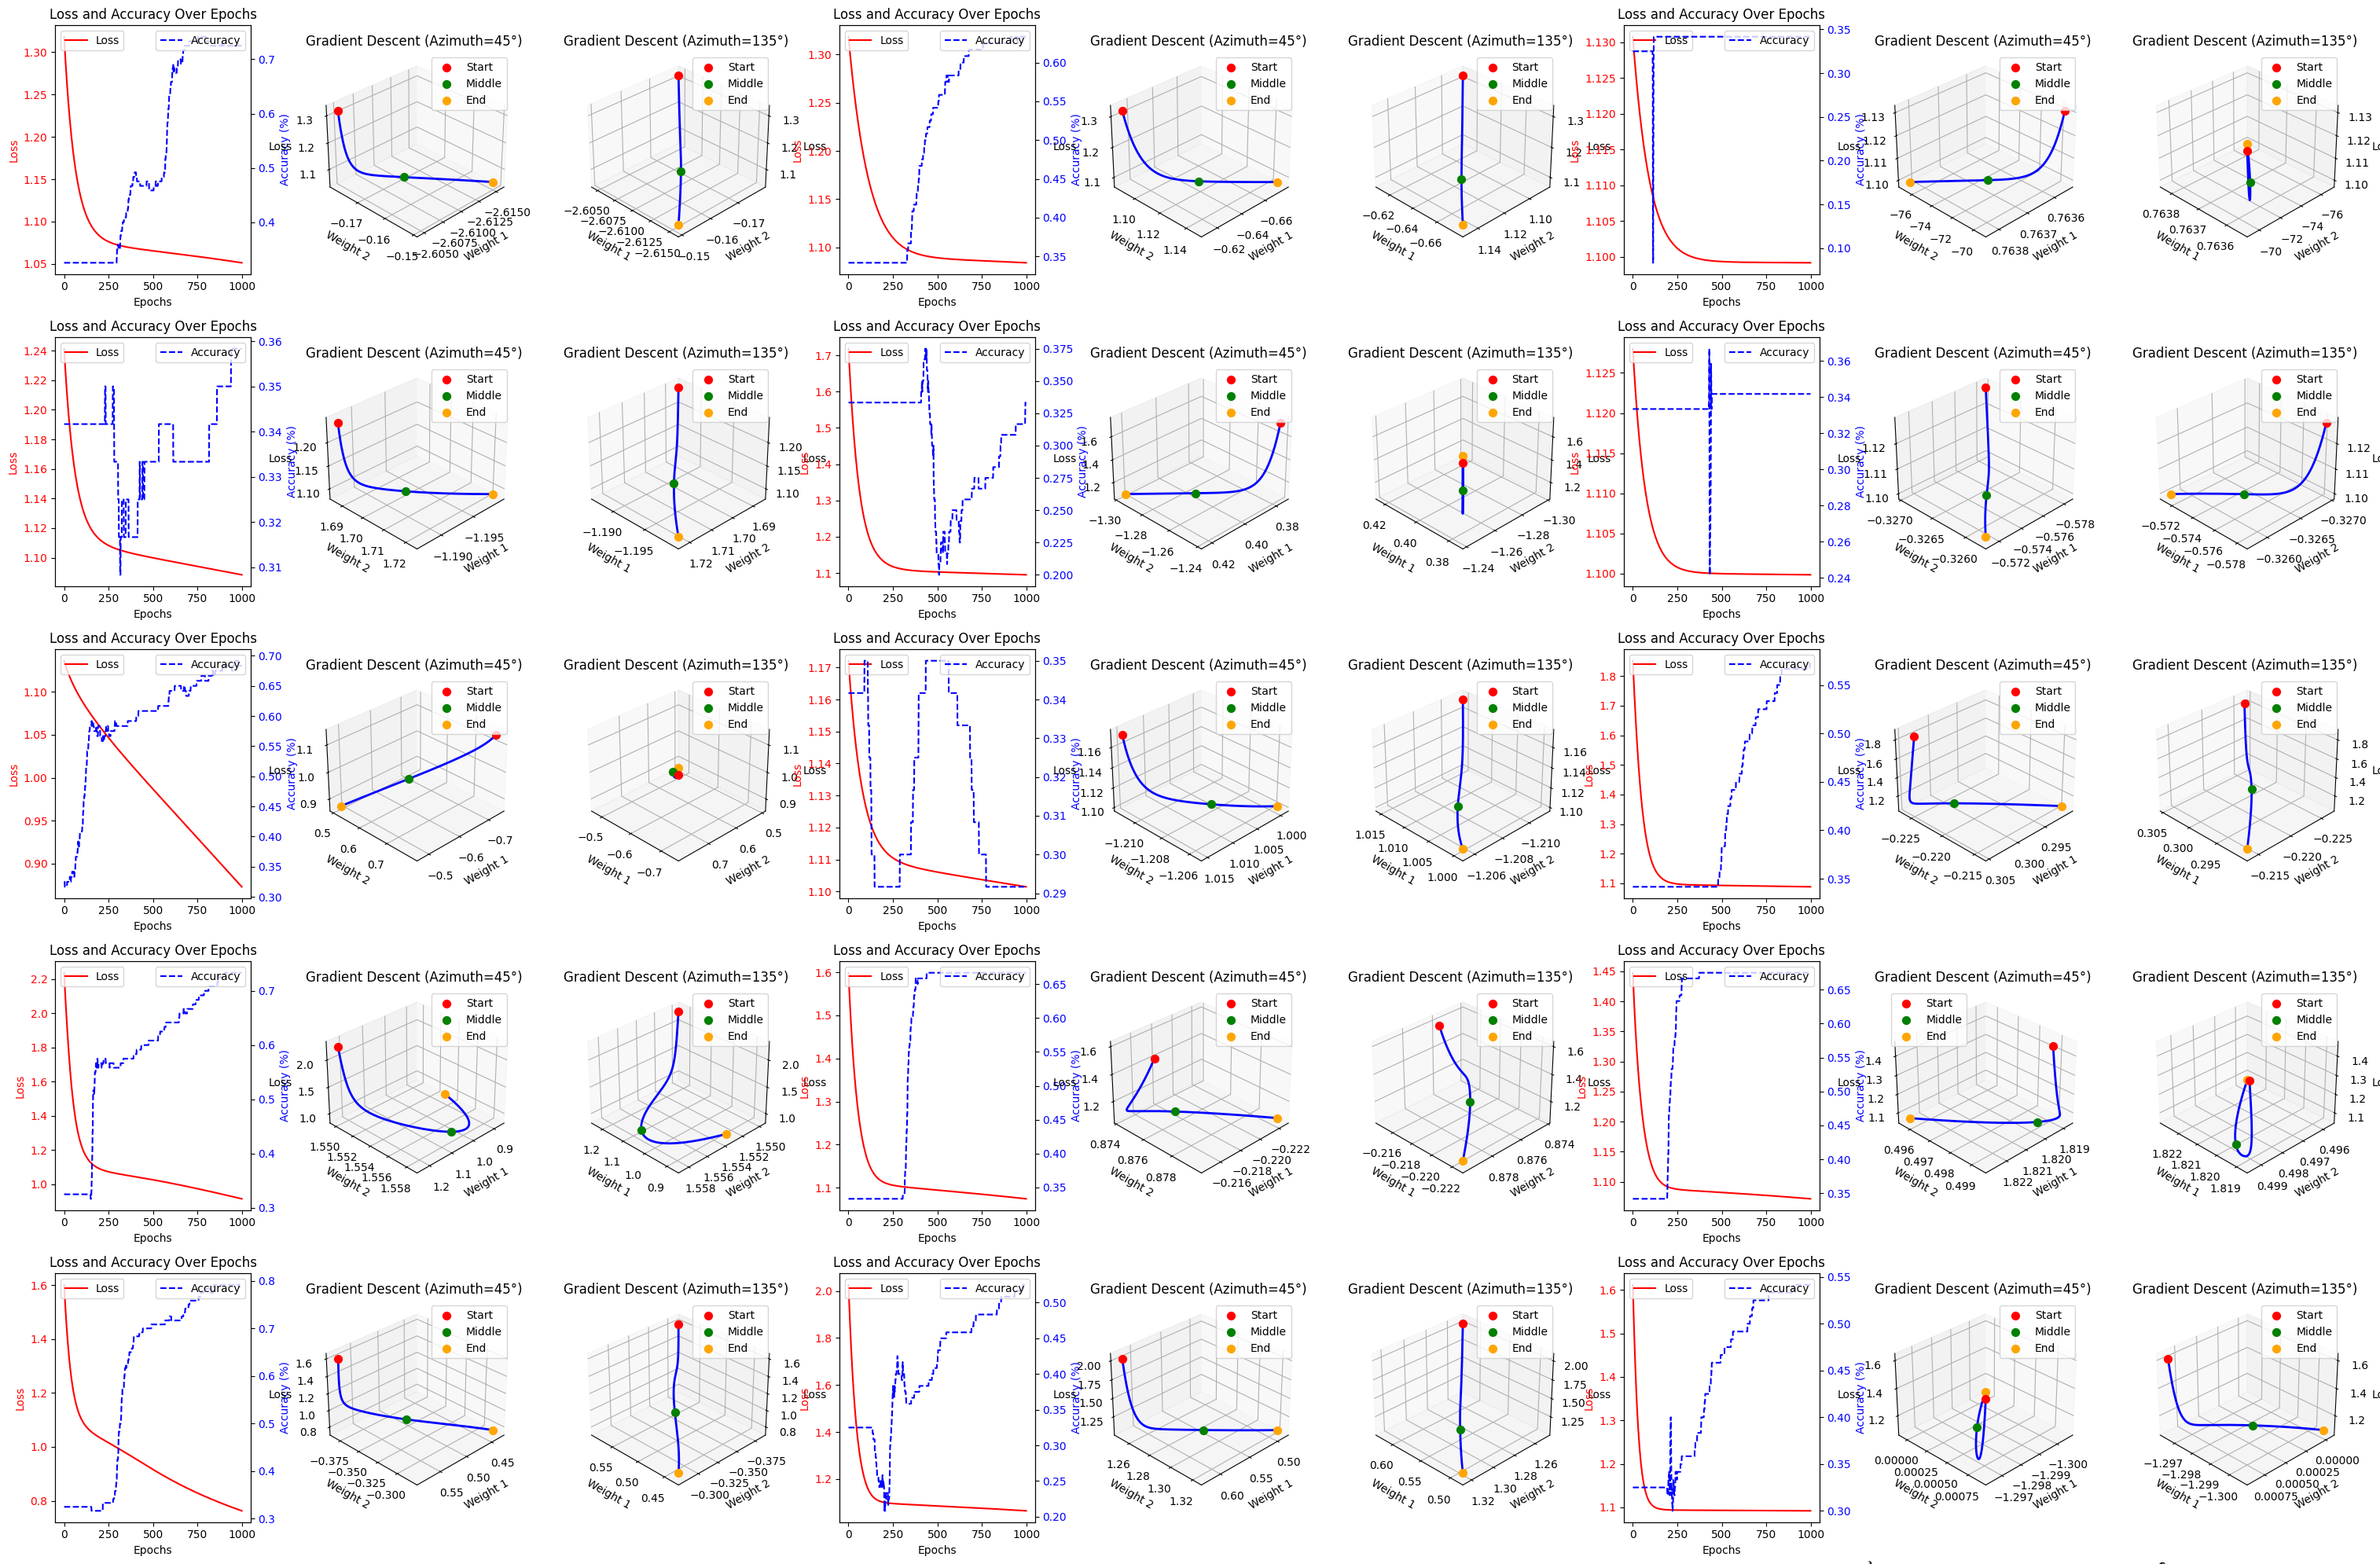

Training for tanh Activation:   0%|          | 0/45 [00:00<?, ?it/s]

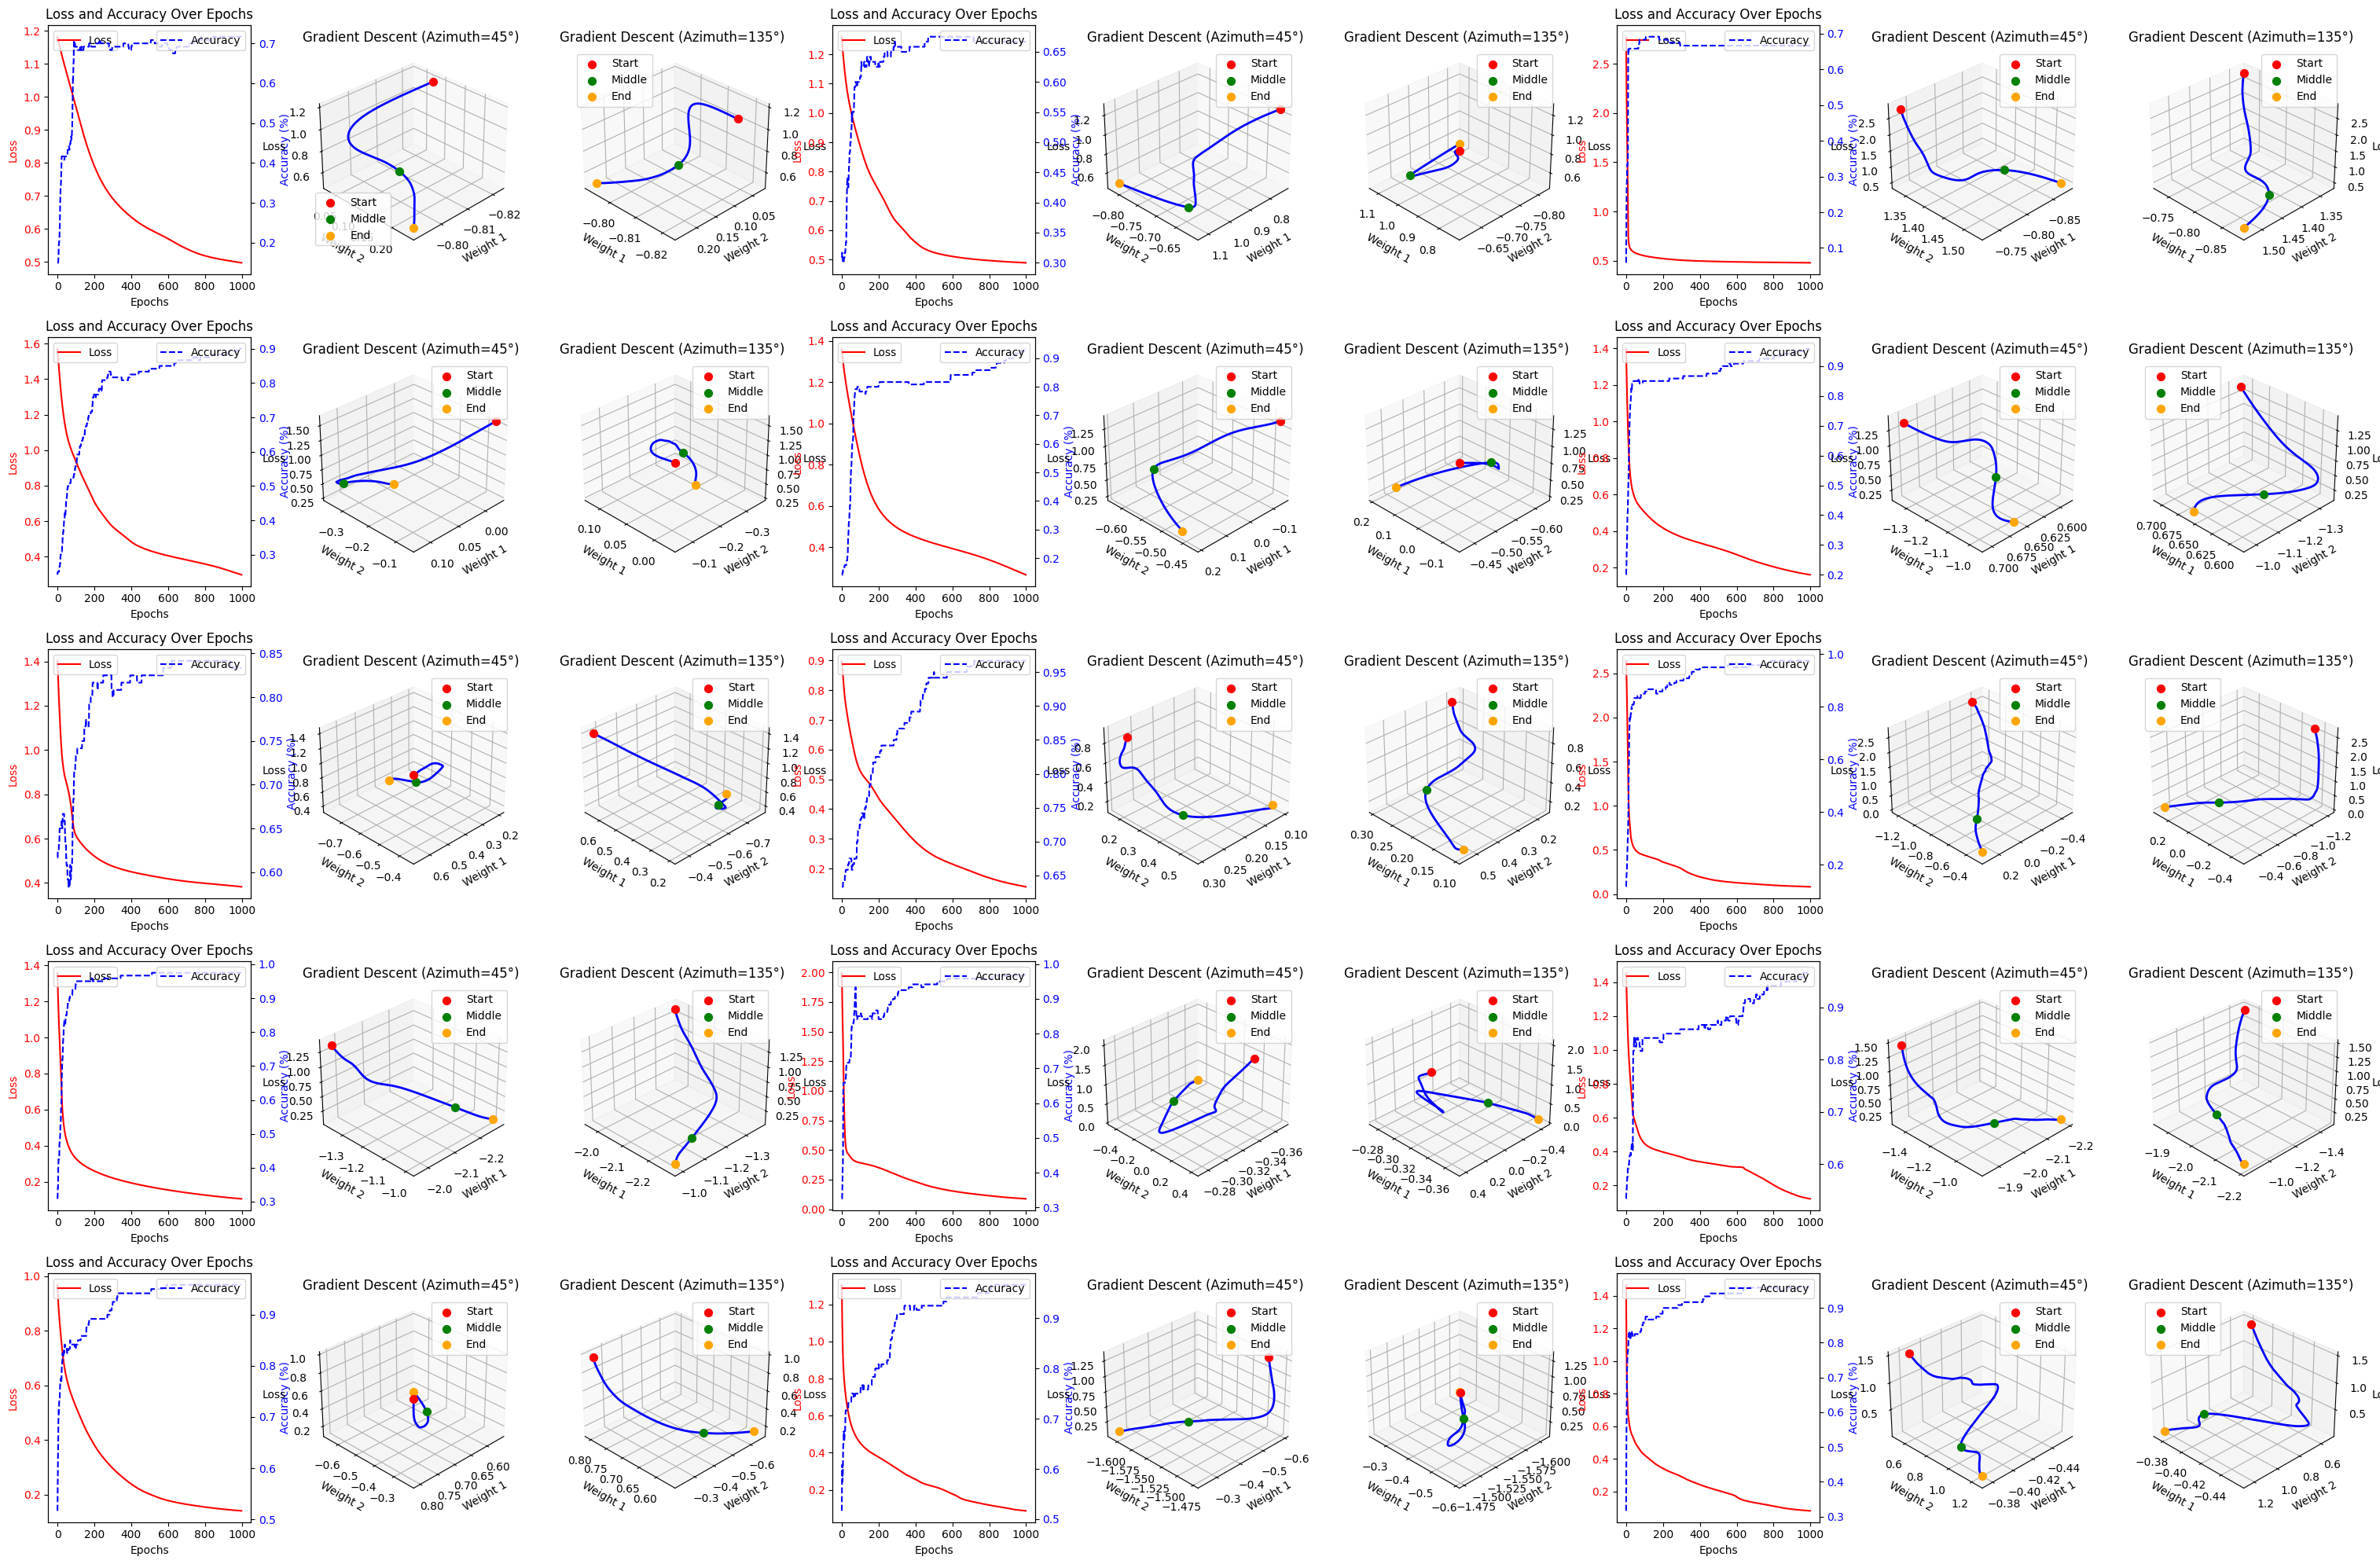

Training for relu Activation:   0%|          | 0/45 [00:00<?, ?it/s]

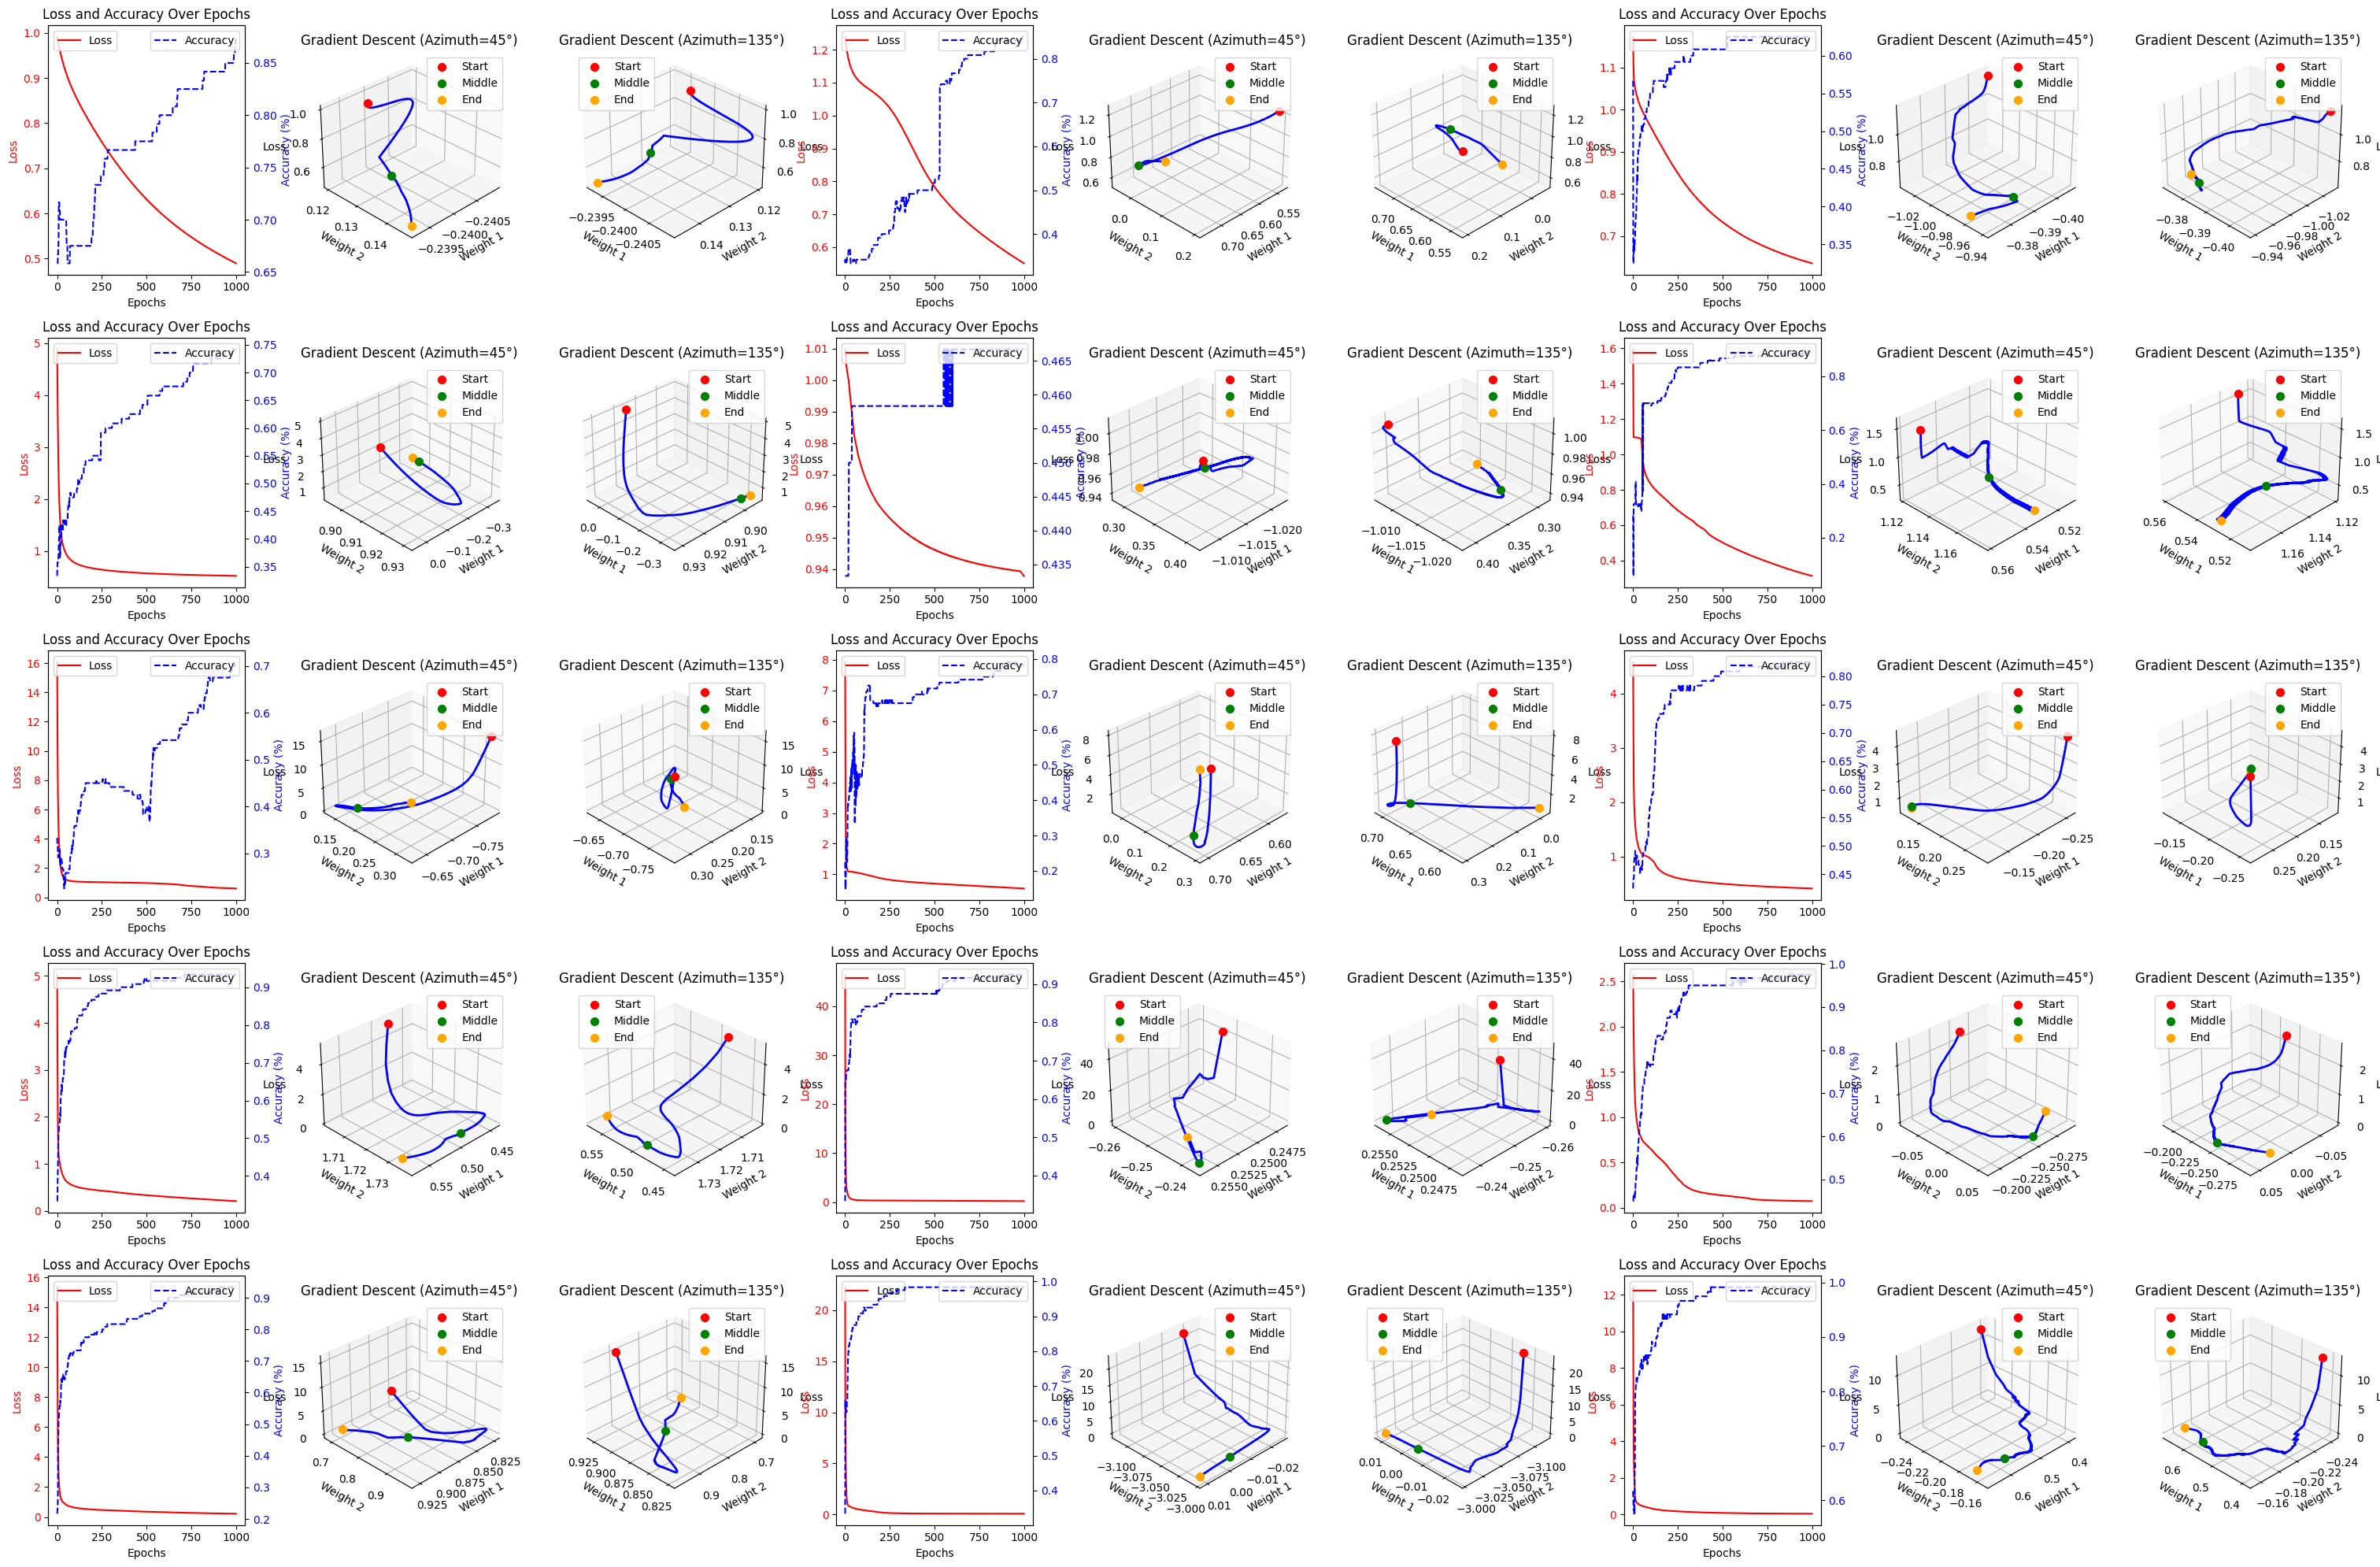

In [24]:
# @title Part 2: Comprehensive Printouts

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the target variable with sparse_output=True
encoder = OneHotEncoder(sparse_output=True)
y = encoder.fit_transform(y.reshape(-1, 1)).toarray()

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

activation_functions = {
    'sigmoid': (sigmoid, sigmoid_derivative),
    'relu': (relu, relu_derivative),
    'tanh': (tanh, tanh_derivative)
}

# Function to build and train the model
def build_and_train_model(layer_sizes, activation_fn, learning_rate=0.01):
    # Initialize weights and biases
    weights = []
    biases = []
    for i in range(len(layer_sizes) - 1):
        weights.append(np.random.randn(layer_sizes[i], layer_sizes[i+1]))
        biases.append(np.zeros((1, layer_sizes[i+1])))

    tracked_w1 = []
    tracked_w2 = []
    tracked_loss = []
    losses = []
    accuracies = []

    # Activation functions
    activation, activation_derivative = activation_functions[activation_fn]

    def forward_propagation(X):
        activations = [X]
        for i in range(len(weights)):
            Z = np.dot(activations[-1], weights[i]) + biases[i]
            A = activation(Z) if i < len(weights) - 1 else softmax(Z)
            activations.append(A)
        return activations

    def backpropagation(activations, Y):
        m = X_train.shape[0]
        grads_w = []
        grads_b = []
        dA = activations[-1] - Y  # dZ for the output layer
        for i in reversed(range(len(weights))):
            dZ = dA
            grads_w.insert(0, np.dot(activations[i].T, dZ) / m)
            grads_b.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
            if i > 0:
                dA = np.dot(dZ, weights[i].T) * activation_derivative(activations[i])
        return grads_w, grads_b

    def update_parameters(grads_w, grads_b):
        for i in range(len(weights)):
            weights[i] -= learning_rate * grads_w[i]
            biases[i] -= learning_rate * grads_b[i]

    def compute_loss(A2, Y):
        m = Y.shape[0]
        logprobs = -np.log(A2[range(m), np.argmax(Y, axis=1)])
        return np.sum(logprobs) / m

    # Training loop
    epochs = 1000
    for epoch in range(epochs):
        # Forward propagation
        activations = forward_propagation(X_train)
        loss = compute_loss(activations[-1], y_train)
        losses.append(loss)

        # Backward propagation
        grads_w, grads_b = backpropagation(activations, y_train)

        # Update parameters
        update_parameters(grads_w, grads_b)

        # Track two weights and the loss
        tracked_w1.append(weights[0][0, 0])  # Tracking a specific weight W1[0,0]
        tracked_w2.append(weights[0][1, 0])  # Tracking another weight W1[1,0]
        tracked_loss.append(loss)

        # Compute accuracy
        predictions = np.argmax(activations[-1], axis=1)
        accuracy = accuracy_score(np.argmax(y_train, axis=1), predictions)
        accuracies.append(accuracy)

    return losses, accuracies, tracked_w1, tracked_w2, tracked_loss

# Softmax for output layer
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=1, keepdims=True)

# Function to plot loss and accuracy (2D) with smooth lines
def plot_loss_accuracy(losses, accuracies, ax):
    ax_loss = ax  # Main axis for loss
    ax_acc = ax_loss.twinx()  # Secondary y-axis for accuracy

    # Plot smooth loss on primary y-axis
    ax_loss.plot(losses, color='red', label='Loss', linestyle='-')
    ax_loss.set_xlabel('Epochs')
    ax_loss.set_ylabel('Loss', color='red')
    ax_loss.tick_params(axis='y', labelcolor='red')

    # Plot smooth accuracy on secondary y-axis
    ax_acc.plot(accuracies, color='blue', label='Accuracy', linestyle='--')
    ax_acc.set_ylabel('Accuracy (%)', color='blue')
    ax_acc.tick_params(axis='y', labelcolor='blue')

    # Set titles and legends
    ax_loss.set_title('Loss and Accuracy Over Epochs')
    ax_loss.legend(loc='upper left')
    ax_acc.legend(loc='upper right')

# 3D Gradient Descent Plot (Parameter Evolution and Loss) with Marked Points
def plot_gradient_descent(tracked_w1, tracked_w2, tracked_loss, ax, view_angle):
    ax.plot(tracked_w1, tracked_w2, tracked_loss, color='blue', lw=2)

    # Mark three key points: start, middle, and end
    ax.scatter(tracked_w1[0], tracked_w2[0], tracked_loss[0], color='red', s=50, label='Start')
    ax.scatter(tracked_w1[len(tracked_w1) // 2], tracked_w2[len(tracked_w2) // 2], tracked_loss[len(tracked_loss) // 2], color='green', s=50, label='Middle')
    ax.scatter(tracked_w1[-1], tracked_w2[-1], tracked_loss[-1], color='orange', s=50, label='End')

    ax.view_init(elev=30, azim=view_angle)
    ax.set_xlabel('Weight 1')
    ax.set_ylabel('Weight 2')
    ax.set_zlabel('Loss')
    ax.set_title(f'Gradient Descent (Azimuth={view_angle}°)')
    ax.legend()

# Function to generate the grid of graphs
def generate_grid(activation_fn):
    fig = plt.figure(figsize=(30, 20))

    # Configurations for layers and neurons per layer
    layer_configs = [(3,), (4,), (5,)]  # 3 layers, 4 layers, 5 layers
    neuron_configs = [3, 4, 5, 6, 7]  # Neurons per hidden layer

    progress_bar = tqdm(total=len(layer_configs) * len(neuron_configs) * 3, desc=f"Training for {activation_fn} Activation")

    for row, neurons in enumerate(neuron_configs):
        for col, layers in enumerate(layer_configs):
            # Build the model for each configuration
            layer_sizes = [X_train.shape[1]] + [neurons] * layers[0] + [y_train.shape[1]]
            losses, accuracies, tracked_w1, tracked_w2, tracked_loss = build_and_train_model(layer_sizes, activation_fn)

            # Create 2D plot for Loss and Accuracy
            ax_loss_acc = fig.add_subplot(5, 9, row * 9 + col * 3 + 1)
            plot_loss_accuracy(losses, accuracies, ax_loss_acc)

            # Create 3D plots for Gradient Descent
            ax_3d_1 = fig.add_subplot(5, 9, row * 9 + col * 3 + 2, projection='3d')
            plot_gradient_descent(tracked_w1, tracked_w2, tracked_loss, ax_3d_1, 45)

            ax_3d_2 = fig.add_subplot(5, 9, row * 9 + col * 3 + 3, projection='3d')
            plot_gradient_descent(tracked_w1, tracked_w2, tracked_loss, ax_3d_2, 135)

            progress_bar.update(3)

    plt.tight_layout()
    plt.show()
    progress_bar.close()

# Run the grid for each activation function
for activation_fn in ['sigmoid', 'tanh', 'relu']:
    generate_grid(activation_fn)